In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/Pytorch-Models

Mounted at /content/gdrive
/content/gdrive/My Drive/Pytorch-Models


In [ ]:
import os
import json

def count_images(image_dir, exts={".jpg", ".jpeg", ".png", ".bmp", ".webp"}):
    image_count = 0
    for filename in os.listdir(image_dir):
        if os.path.splitext(filename.lower())[1] in exts:
            image_count += 1
    print(f"Total images: {image_count}")

count_images("datasets/excavator/train")
count_images("datasets/excavator/valid")

Total images: 642
Total images: 54


In [ ]:
train_json = "datasets/excavator/train/_annotations_fixed.coco.json"
valid_json = "datasets/excavator/valid/_annotations_fixed.coco.json"

In [ ]:
# From root of CenterNet repo

!mkdir -p /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/annotations
!mkdir -p /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/train2017
!mkdir -p /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/val2017

# Copy annotations
!cp datasets/excavator/train/_annotations_fixed.coco.json /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/annotations/person_keypoints_train2017.json
!cp datasets/excavator/valid/_annotations_fixed.coco.json /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/annotations/person_keypoints_val2017.json

# Copy images
!cp datasets/excavator/train/*.jpg /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/train2017/
!cp datasets/excavator/valid/*.jpg /content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/val2017/

In [ ]:
import os
import json

def count_images(image_dir, exts={".jpg", ".jpeg", ".png", ".bmp", ".webp"}):
    image_count = 0
    for filename in os.listdir(image_dir):
        if os.path.splitext(filename.lower())[1] in exts:
            image_count += 1
    print(f"Total images: {image_count}")

count_images("/content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/train2017/")
count_images("/content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/val2017/")

Total images: 642
Total images: 54


In [ ]:
train_json = "/content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/annotations/person_keypoints_train2017.json"
valid_json = "/content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/annotations/person_keypoints_val2017.json"

In [ ]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import math
import random

def visualize_coco_keypoints(json_path, img_dir, num_images=9):
    coco = COCO(json_path)
    img_ids = coco.getImgIds()
    random.shuffle(img_ids)
    num_images = min(num_images, len(img_ids))

    # Find category that has keypoints
    cats = coco.loadCats(coco.getCatIds())
    cat_with_kps = next((cat for cat in cats if 'keypoints' in cat and 'skeleton' in cat), None)

    if not cat_with_kps:
        print("No category with keypoints and skeleton found.")
        return

    keypoint_names = cat_with_kps['keypoints']
    skeleton = cat_with_kps['skeleton']

    cols = 3
    rows = math.ceil(num_images / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten()

    for idx in range(num_images):
        img_id = img_ids[idx]
        img_info = coco.loadImgs(img_id)[0]
        img_path = os.path.join(img_dir, img_info['file_name'])
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image not found: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ann_ids = coco.getAnnIds(imgIds=img_info['id'])
        anns = coco.loadAnns(ann_ids)

        ax = axes[idx]
        ax.imshow(img)

        for ann in anns:
            if 'keypoints' not in ann:
                continue

            kps = ann['keypoints']
            keypoints_xyv = [(kps[i], kps[i+1], kps[i+2]) for i in range(0, len(kps), 3)]

            # Plot skeleton lines
            for pair in skeleton:
                idx1, idx2 = pair[0] - 1, pair[1] - 1  # 1-based to 0-based
                if idx1 < len(keypoints_xyv) and idx2 < len(keypoints_xyv):
                    x1, y1, v1 = keypoints_xyv[idx1]
                    x2, y2, v2 = keypoints_xyv[idx2]
                    if v1 > 0 and v2 > 0:
                        ax.plot([x1, x2], [y1, y2], 'cyan', linewidth=2)

            # Plot keypoints
            for i, (x, y, v) in enumerate(keypoints_xyv):
                if v > 0:
                    ax.plot(x, y, 'ro' if v == 2 else 'go', markersize=5)
                    ax.text(x + 5, y - 5, keypoint_names[i],
                            fontsize=8,
                            color='blue',
                            ha='left', va='bottom')

        ax.set_title(img_info['file_name'], fontsize=10)
        ax.axis('off')

    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


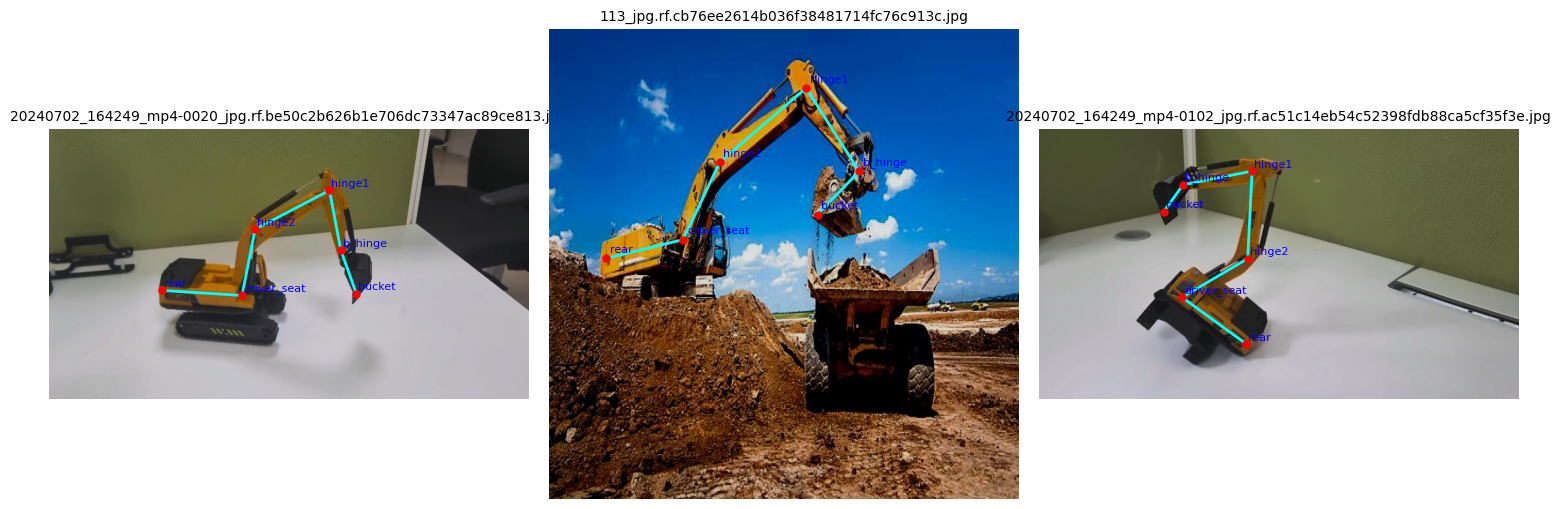

In [ ]:
visualize_coco_keypoints(train_json, "/content/gdrive/MyDrive/Pytorch-Models/CenterNet/data/excavator/train2017/", num_images=3)

In [2]:
!git clone https://github.com/xingyizhou/CenterNet.git /content/gdrive/MyDrive/Pytorch-Models/CenterNet

fatal: destination path '/content/gdrive/MyDrive/Pytorch-Models/CenterNet' already exists and is not an empty directory.


In [3]:
!ln -s /content/gdrive/MyDrive/Pytorch-Models/CenterNet /content/CenterNet
%cd /content/CenterNet

/content/gdrive/MyDrive/Pytorch-Models/CenterNet


In [ ]:
!pip install cython
!pip install -r requirements.txt

In [ ]:
!pip install progress

In [6]:
%cd /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2

/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2


In [ ]:
%cd /content
!git clone https://github.com/lbin/DCNv2.git
%cd /content/DCNv2
!git checkout pytorch_2.0.1
!python setup.py build develop

In [8]:
!rm -rf /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2
!cp -r /content/DCNv2 /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2

In [11]:
%cd /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/external
!python setup.py build_ext --inplace

/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/external


In [12]:
%cd /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src

/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src


In [ ]:
!python demo.py multi_pose --demo /content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg --load_model /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth

In [ ]:
!python demo.py multi_pose --demo /content/gdrive/MyDrive/Pytorch-Models/datasets/pose-tests --load_model /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth

In [13]:
import sys
CENTERNET_PATH = "/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/"
sys.path.insert(0, CENTERNET_PATH)

In [14]:
import sys
sys.path.append('/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2')

In [ ]:
!touch /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/datasets/__init__.py

In [ ]:
!python main.py \
  multi_pose \
  --dataset coco_hp \
  --exp_id excavator_pose \
  --batch_size 8 \
  --master_batch 4 \
  --num_epochs 20 \
  --lr 2.5e-4 \
  --gpus 0 \
  --load_model /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth \
  --num_workers 4

PYTHONPATH = ['/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/', '/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '/usr/local/lib/python3.11/dist-packages', '/content/DCNv2', '/usr/lib/python3/dist-packages']
Fix size testing.
training chunk_sizes: [4]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/excavator_pose
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Namespace(task='multi_pose', dataset='coco_hp', exp_id='excavator_pose', test=False, debug=0, demo='', load_model='/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth', resume=False, gpus=[0], num_workers=4, not_cuda_benchmark=False, seed=317, print_iter=0, hide_data_time=False, save_all=False, metric='loss'

In [15]:
!python test.py \
  multi_pose \
  --dataset coco_hp \
  --exp_id excavator_pose \
  --keep_res \
  --resume

Keep resolution testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/excavator_pose
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Namespace(task='multi_pose', dataset='coco_hp', exp_id='excavator_pose', test=False, debug=0, demo='', load_model='/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/excavator_pose/model_last.pth', resume=True, gpus=[0], num_workers=4, not_cuda_benchmark=False, seed=317, print_iter=0, hide_data_time=False, save_all=False, metric='loss', vis_thresh=0.3, debugger_theme='white', arch='dla_34', head_conv=256, down_ratio=4, input_res=512, input_h=512, input_w=512, lr=0.000125, lr_step=[90, 120], num_epochs=140, batch_size=32, master_batch_size=32, num_iters=-1, val_intervals=5, trainval=False, flip_test=False, test_scales=[1.0], nms=False, K=100, not_prefetch_test=False, fix_res=False, keep_res=True, not_rand_crop=False,

In [16]:
skeleton = [[0, 5], [1, 2], [2, 3], [3, 4], [5, 1]]

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                color = (255, 255, 0)
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color, 3, lineType=cv2.LINE_AA)

    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20


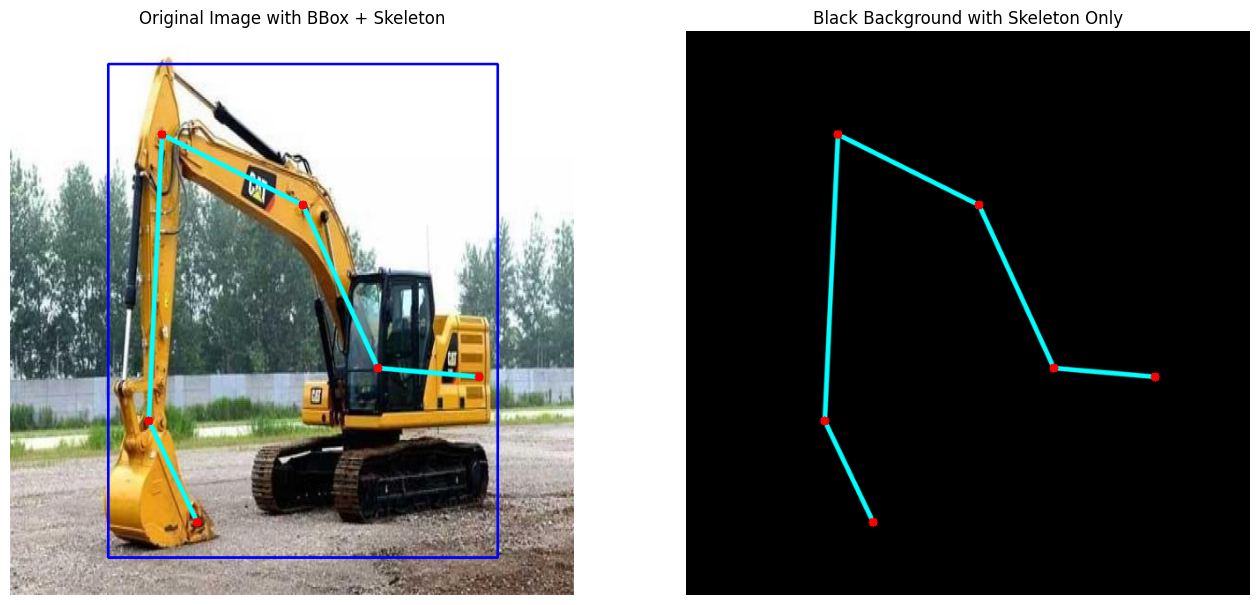

In [20]:
from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

img_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/excavator/valid/Baidu_0231_jpeg_jpg.rf.63fd1885d49dc906250100c329de76ca.jpg'
img = cv2.imread(img_path)
if img is None:
    raise Exception("Image not found or unreadable")

results = detector.run(img)
keypoints = results['results']

CONF_THRESHOLD = 0.3

# Prepare images:
img_with_bbox = img.copy()
img_skeleton_only = np.zeros_like(img)  # black image same size as original

for cls_id, detections in keypoints.items():
    for det in detections:
        score = det[4]
        if score < CONF_THRESHOLD:
            continue

        bbox = det[0:4]
        keypoints_coords = det[5:]
        keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i + 1]) for i in range(0, len(keypoints_coords), 2)]

        # Draw on original image copy with bbox
        draw_keypoints_and_skeleton(img_with_bbox, bbox, keypoints_pairs, draw_bbox=True)

        # Draw on black image WITHOUT bbox
        draw_keypoints_and_skeleton(img_skeleton_only, bbox, keypoints_pairs, draw_bbox=False)

# Convert BGR to RGB for matplotlib
img_with_bbox_rgb = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB)
img_skeleton_only_rgb = cv2.cvtColor(img_skeleton_only, cv2.COLOR_BGR2RGB)

# Plot side-by-side
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.title('Original Image with BBox + Skeleton')
plt.axis('off')
plt.imshow(img_with_bbox_rgb)

plt.subplot(1, 2, 2)
plt.title('Black Background with Skeleton Only')
plt.axis('off')
plt.imshow(img_skeleton_only_rgb)

plt.show()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20


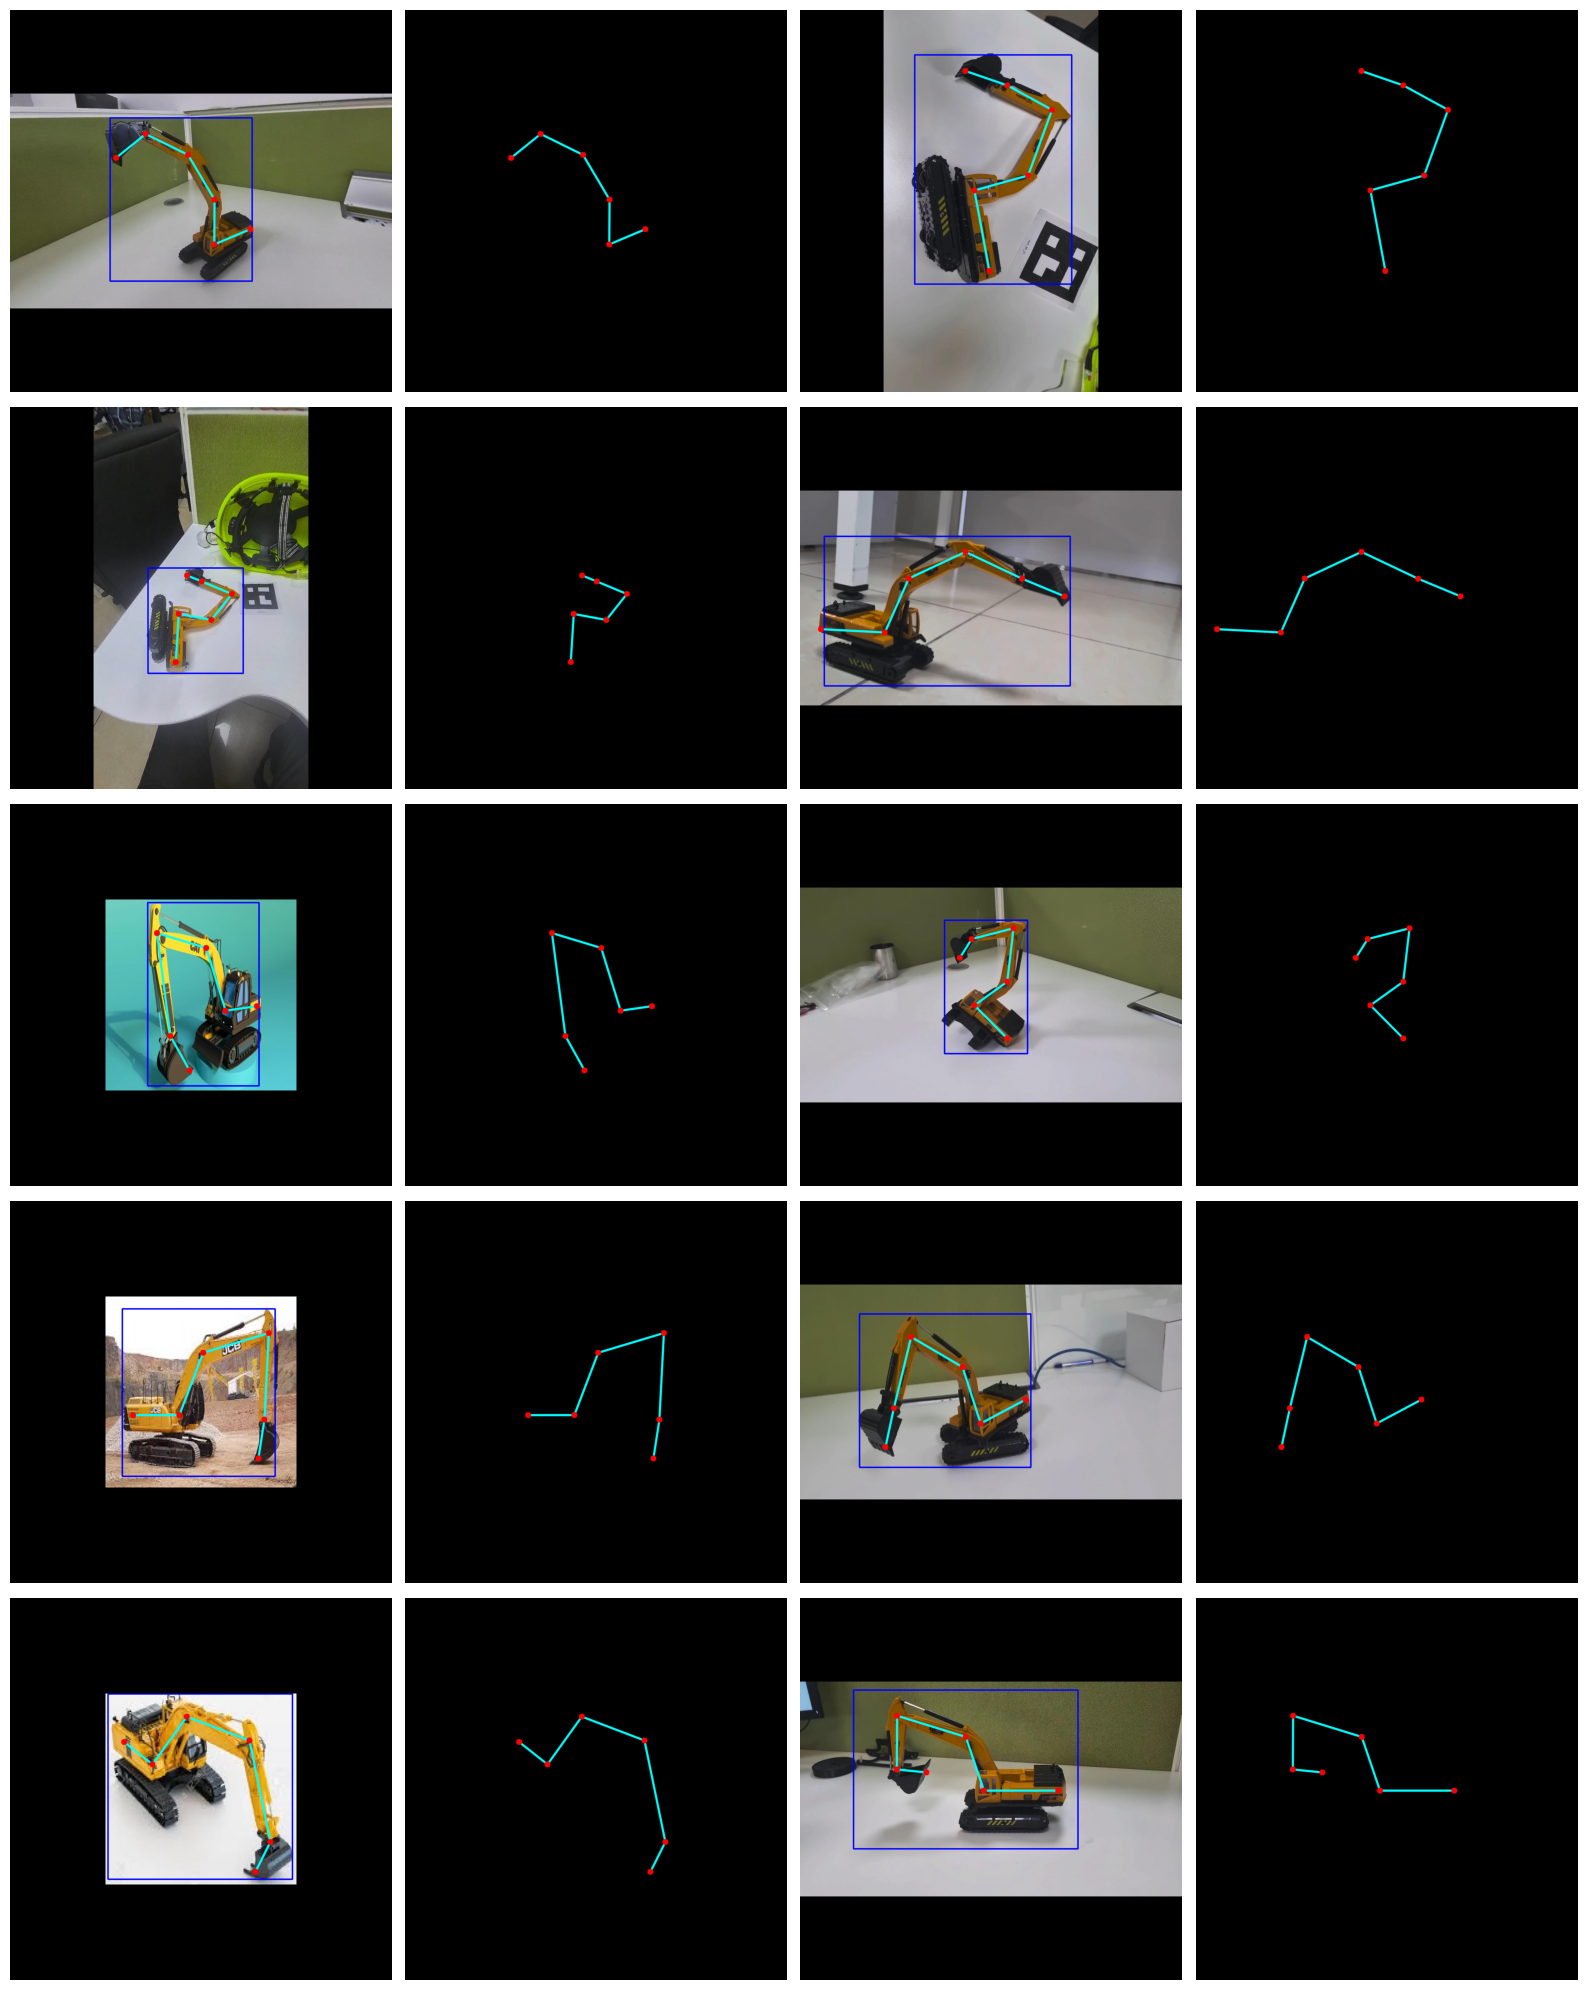

In [23]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 4)

    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                color = (255, 255, 0)
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color, 6, lineType=cv2.LINE_AA)

    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 10, (0, 0, 255), -1)

# ------------------
# Image folder setup
# ------------------
val_dir = "/content/gdrive/MyDrive/Pytorch-Models/datasets/excavator/valid/"
num_samples = 10  # you can adjust how many input images to visualize

all_imgs = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_imgs = random.sample(all_imgs, min(num_samples, len(all_imgs)))

img_paths = [os.path.join(val_dir, fname) for fname in selected_imgs]

# ------------------
# Load model
# ------------------
from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

# ------------------
# Process and collect visuals
# ------------------
processed_imgs = []
img_sizes = []

CONF_THRESHOLD = 0.3

for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        continue

    results = detector.run(img)
    keypoints = results['results']

    # Prepare two outputs
    img_with_bbox = img.copy()
    img_skeleton_only = np.zeros_like(img)

    for cls_id, detections in keypoints.items():
        for det in detections:
            score = det[4]
            if score < CONF_THRESHOLD:
                continue

            bbox = det[0:4]
            keypoints_coords = det[5:]
            keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i + 1]) for i in range(0, len(keypoints_coords), 2)]

            draw_keypoints_and_skeleton(img_with_bbox, bbox, keypoints_pairs, draw_bbox=True)
            draw_keypoints_and_skeleton(img_skeleton_only, bbox, keypoints_pairs, draw_bbox=False)

    # Convert to RGB for matplotlib
    img_with_bbox_rgb = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB)
    img_skeleton_only_rgb = cv2.cvtColor(img_skeleton_only, cv2.COLOR_BGR2RGB)

    processed_imgs.append((img_with_bbox_rgb, img_skeleton_only_rgb))
    img_sizes.append(img.shape[:2])  # (height, width)

# ------------------
# Prepare for grid plot
# ------------------
max_height = max(h for h, w in img_sizes)
max_width = max(w for h, w in img_sizes)

cols = 4  # 2 images x 2 visuals = 4 subplots per row
rows = (len(processed_imgs) + 1) // 2  # 2 images per row

plt.figure(figsize=(4 * cols, 4 * rows))

for idx, (img1, img2) in enumerate(processed_imgs):
    for view_idx, view in enumerate([img1, img2]):
        h, w = view.shape[:2]
        top = (max_height - h) // 2
        bottom = max_height - h - top
        left = (max_width - w) // 2
        right = max_width - w - left
        padded = cv2.copyMakeBorder(view, top, bottom, left, right, borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

        plot_idx = idx * 2 + view_idx + 1
        plt.subplot(rows, cols, plot_idx)
        plt.imshow(padded)
        plt.axis('off')

plt.tight_layout()
plt.show()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20


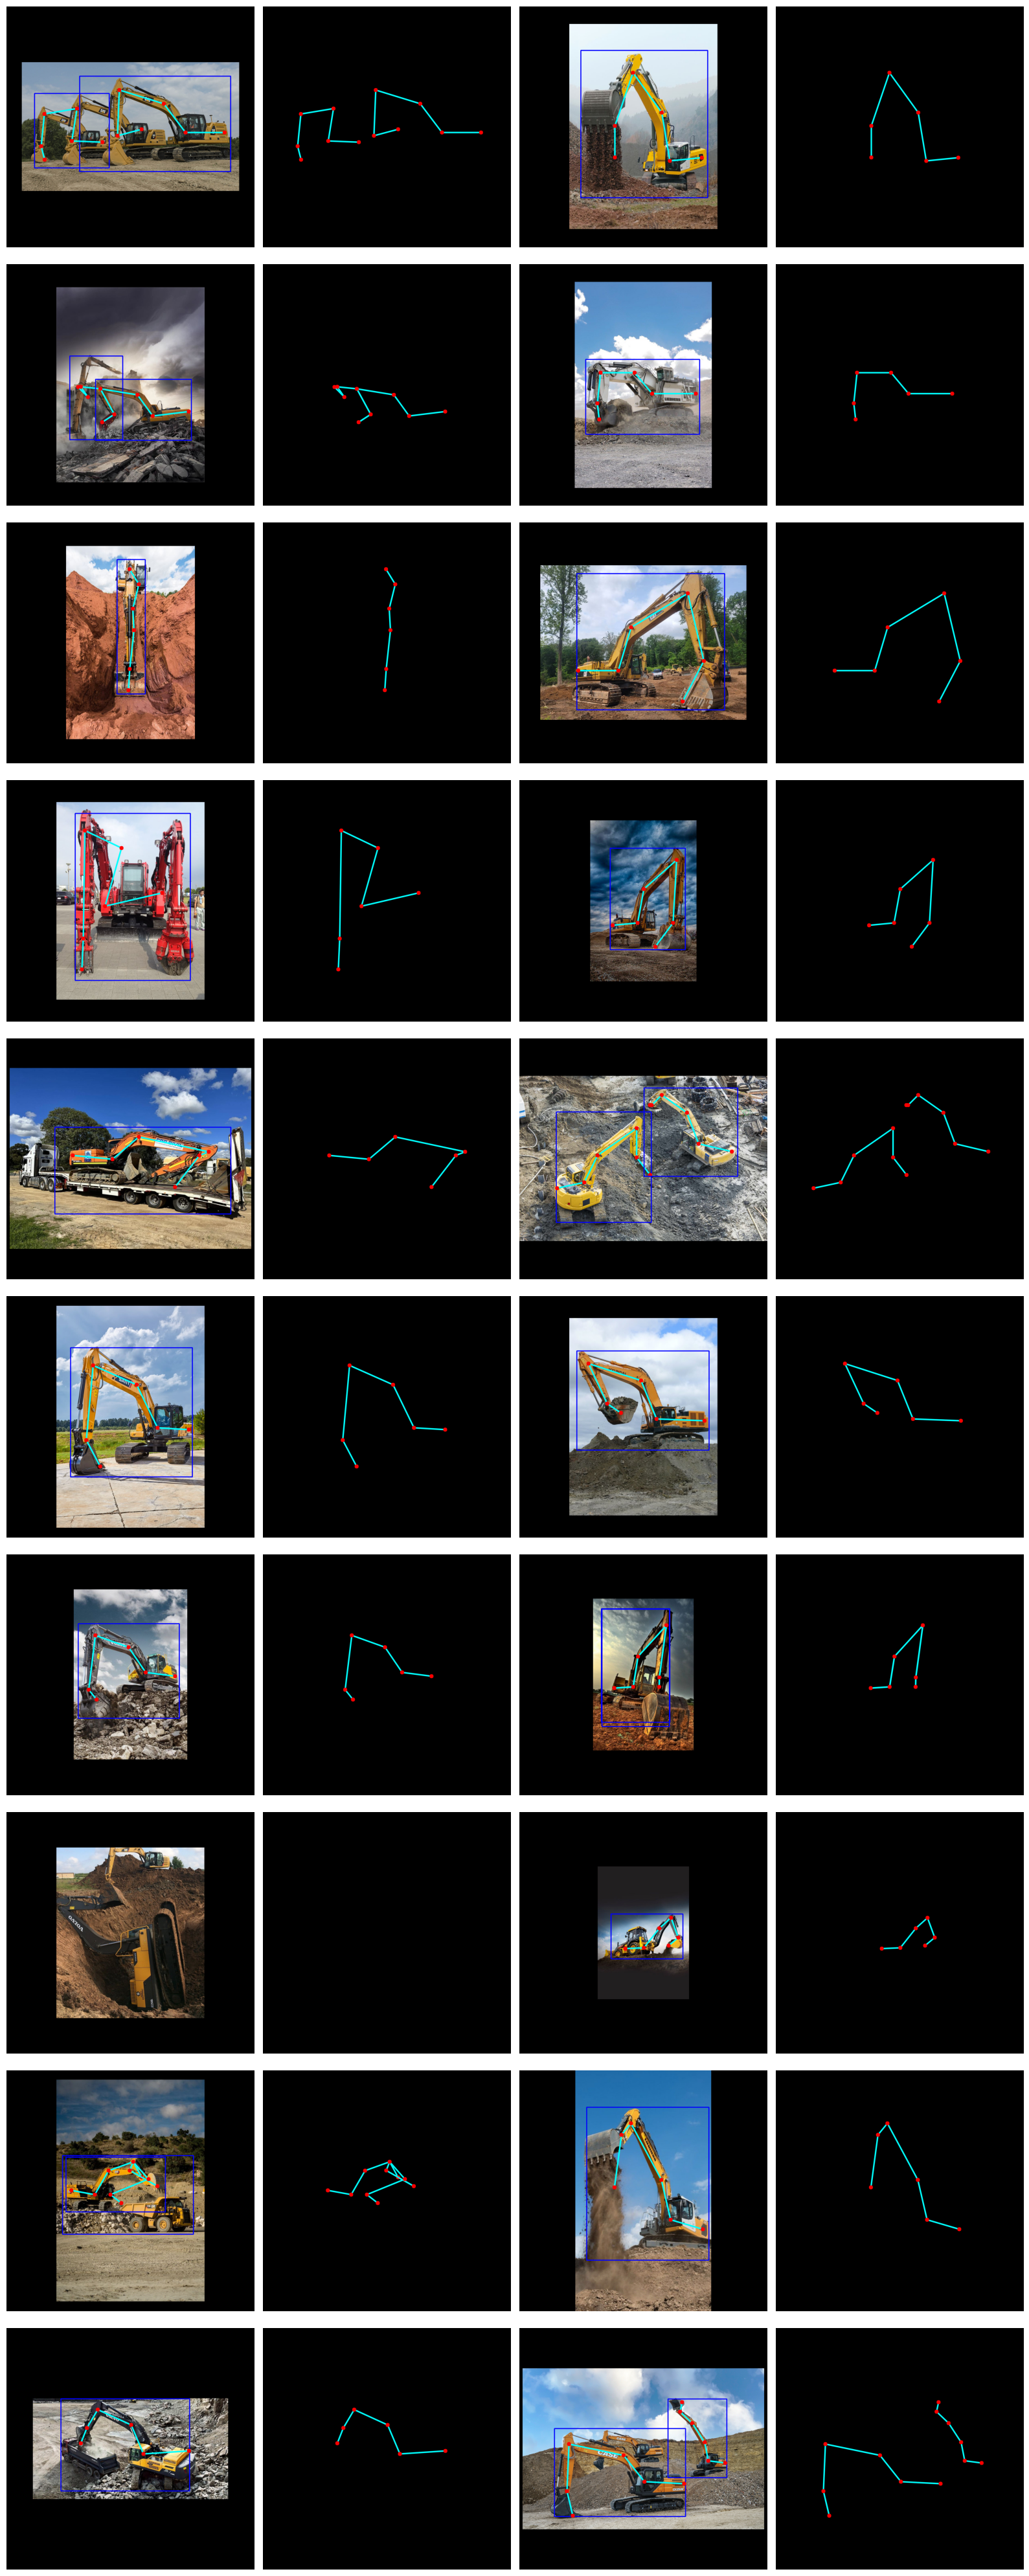

In [22]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 4)

    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                color = (255, 255, 0)
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color, 6, lineType=cv2.LINE_AA)

    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 10, (0, 0, 255), -1)

# ------------------
# Image folder setup
# ------------------
val_dir = "/content/gdrive/MyDrive/Pytorch-Models/datasets/excavator/excavators-test"
num_samples = 20  # you can adjust how many input images to visualize

all_imgs = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_imgs = random.sample(all_imgs, min(num_samples, len(all_imgs)))

img_paths = [os.path.join(val_dir, fname) for fname in selected_imgs]

# ------------------
# Load model
# ------------------
from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

# ------------------
# Process and collect visuals
# ------------------
processed_imgs = []
img_sizes = []

CONF_THRESHOLD = 0.3

for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        continue

    results = detector.run(img)
    keypoints = results['results']

    # Prepare two outputs
    img_with_bbox = img.copy()
    img_skeleton_only = np.zeros_like(img)

    for cls_id, detections in keypoints.items():
        for det in detections:
            score = det[4]
            if score < CONF_THRESHOLD:
                continue

            bbox = det[0:4]
            keypoints_coords = det[5:]
            keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i + 1]) for i in range(0, len(keypoints_coords), 2)]

            draw_keypoints_and_skeleton(img_with_bbox, bbox, keypoints_pairs, draw_bbox=True)
            draw_keypoints_and_skeleton(img_skeleton_only, bbox, keypoints_pairs, draw_bbox=False)

    # Convert to RGB for matplotlib
    img_with_bbox_rgb = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB)
    img_skeleton_only_rgb = cv2.cvtColor(img_skeleton_only, cv2.COLOR_BGR2RGB)

    processed_imgs.append((img_with_bbox_rgb, img_skeleton_only_rgb))
    img_sizes.append(img.shape[:2])  # (height, width)

# ------------------
# Prepare for grid plot
# ------------------
max_height = max(h for h, w in img_sizes)
max_width = max(w for h, w in img_sizes)

cols = 4  # 2 images x 2 visuals = 4 subplots per row
rows = (len(processed_imgs) + 1) // 2  # 2 images per row

plt.figure(figsize=(4 * cols, 4 * rows))

for idx, (img1, img2) in enumerate(processed_imgs):
    for view_idx, view in enumerate([img1, img2]):
        h, w = view.shape[:2]
        top = (max_height - h) // 2
        bottom = max_height - h - top
        left = (max_width - w) // 2
        right = max_width - w - left
        padded = cv2.copyMakeBorder(view, top, bottom, left, right, borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

        plot_idx = idx * 2 + view_idx + 1
        plt.subplot(rows, cols, plot_idx)
        plt.imshow(padded)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [111]:
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 3)

    skeleton = [(0, 5), (1, 2), (2, 3), (3, 4), (5, 1)]  # zero-based
    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), (255, 255, 0), 5, lineType=cv2.LINE_AA)

    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 8, (0, 0, 255), -1)

from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

# --- Video input/output ---
video_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/excavator/excavators-videos/excavatorvideo3.mp4'
save_path = '/content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo3exp.mp4'

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fixed_height = 720
aspect_ratio = w / h
new_width = int(fixed_height * aspect_ratio)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter(save_path, fourcc, fps, (new_width, fixed_height))

pbar = tqdm(total=int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), desc="Processing Video")

CONF_THRESHOLD = 0.3
alpha = 0.9

# Smoothing states
prev_boxes = {}
prev_keypoints = {}

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (new_width, fixed_height))

    results = detector.run(frame)
    keypoints = results['results']

    for cls_id, detections in keypoints.items():
        if cls_id not in prev_boxes:
            prev_boxes[cls_id] = []
            prev_keypoints[cls_id] = []

        for i, det in enumerate(detections):
            score = det[4]
            if score < CONF_THRESHOLD:
                continue

            box = np.array(det[0:4])
            kps = np.array([(det[i], det[i+1]) for i in range(5, len(det), 2)])

            # --- Smooth box ---
            if len(prev_boxes[cls_id]) <= i:
                prev_boxes[cls_id].append(box)
            else:
                prev_boxes[cls_id][i] = alpha * prev_boxes[cls_id][i] + (1 - alpha) * box
            smoothed_box = prev_boxes[cls_id][i]

            # --- Smooth keypoints ---
            if len(prev_keypoints[cls_id]) <= i:
                prev_keypoints[cls_id].append(kps)
            else:
                prev_keypoints[cls_id][i] = alpha * prev_keypoints[cls_id][i] + (1 - alpha) * kps
            smoothed_kps = prev_keypoints[cls_id][i]

            draw_keypoints_and_skeleton(frame, smoothed_box, smoothed_kps, draw_bbox=True)

    writer.write(frame)
    pbar.update(1)

cap.release()
writer.release()
pbar.close()

print("Video saved to:", save_path)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20


Processing Video: 100%|██████████| 1504/1504 [01:39<00:00, 15.09it/s]

Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo3exp.mp4


In [ ]:
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20
Processing Video: 100%|██████████| 2740/2740 [02:58<00:00, 15.39it/s]Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo6exp.mp4

In [ ]:
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20
Processing Video: 100%|██████████| 1500/1500 [01:39<00:00, 15.03it/s]Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo5exp.mp4

In [ ]:
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20
Processing Video: 100%|██████████| 501/501 [00:33<00:00, 14.85it/s]Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo4exp.mp4

In [ ]:
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20
Processing Video: 100%|██████████| 1504/1504 [01:39<00:00, 15.09it/s]Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo3exp.mp4

In [ ]:
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20
Processing Video: 100%|██████████| 599/599 [00:43<00:00, 13.72it/s]Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo2exp.mp4

In [ ]:
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 12, 'reg': 2, 'hm_hp': 6, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/exp/multi_pose/excavator_pose/model_last.pth, epoch 20
Processing Video: 100%|██████████| 628/628 [00:42<00:00, 14.86it/s]Video saved to: /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/excavatorvideo1exp.mp4

In [117]:
!ls -lh /content/gdrive/MyDrive/Pytorch-Models/excavators-videos-results-centernet/

total 428M
-rw------- 1 root root  43M Aug  4 16:01 excavatorvideo1exp.mp4
-rw------- 1 root root  93M Aug  4 16:04 excavatorvideo2exp.mp4
-rw------- 1 root root  73M Aug  4 16:46 excavatorvideo3exp.mp4
-rw------- 1 root root  22M Aug  4 16:28 excavatorvideo4exp.mp4
-rw------- 1 root root  96M Aug  4 16:33 excavatorvideo5exp.mp4
-rw------- 1 root root 104M Aug  4 16:11 excavatorvideo6exp.mp4
